# What type of cells is it?

In [1]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai timm fastdownload

In [2]:
from fastai.vision.all import *

import timm
from fastdownload import download_url
from fastai.vision.all import *







/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


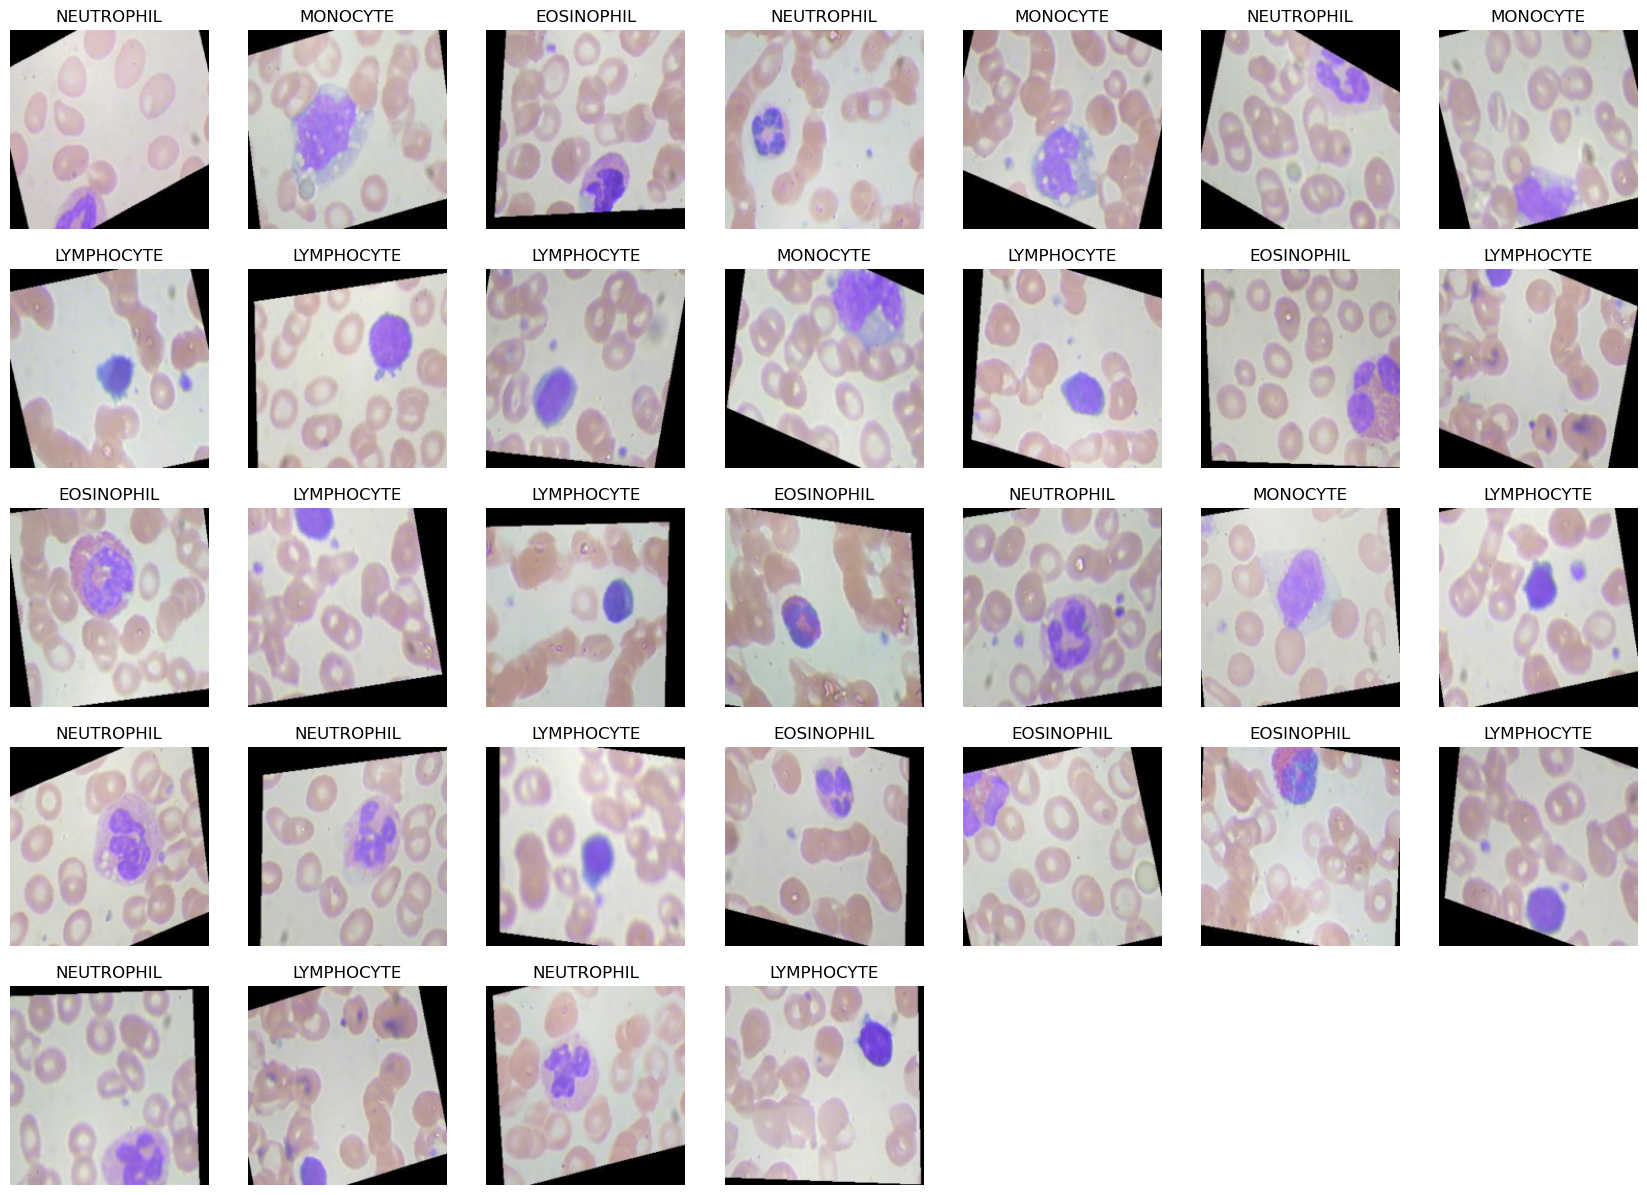

In [3]:

path = Path('/kaggle/input/blood-cell-types/')

from time import sleep

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=60)

In [4]:
timm.list_models('convnext*')

['convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_mlp',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_tiny',
 'convnext_tiny_hnf',
 'convnext_xlarge',
 'convnext_xxlarge',
 'convnextv2_atto',
 'convnextv2_base',
 'convnextv2_femto',
 'convnextv2_huge',
 'convnextv2_large',
 'convnextv2_nano',
 'convnextv2_pico',
 'convnextv2_small',
 'convnextv2_tiny']

In [5]:
learn = vision_learner(dls, 'convnext_nano', metrics=error_rate).to_fp16()
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.410462,0.172804,0.064722,02:36


epoch,train_loss,valid_loss,error_rate,time
0,0.102771,0.060488,0.025170,02:49
1,0.050169,0.025487,0.011586,02:49
2,0.027769,0.011332,0.003596,02:48
3,0.007114,0.002714,0.001199,02:48
4,0.004252,0.000687,0.000000,02:48
5,0.000847,0.000738,0.000400,02:49


In [6]:
categories = learn.dls.vocab

def classify_image(img):
    pred,idx, probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))
img = "/kaggle/input/blood-cells/dataset-master/dataset-master/JPEGImages/BloodImage_00009.jpg"
    
classify_image(img)

{'EOSINOPHIL': 0.9999998807907104,
 'LYMPHOCYTE': 1.1447952308341058e-10,
 'MONOCYTE': 1.2237630464539961e-08,
 'NEUTROPHIL': 8.781382376810143e-08}

In [ ]:
learn.export('model.pkl')